In [1]:
import os
import numpy as np
import pandas as pd
from  matplotlib import pyplot as plt
%matplotlib inline

def plot_perf(file_name, metric, col):   
    df1 = pd.read_csv(file_name, header=-1, skiprows=4)
    ttl_var = file_name.replace('./dqn_full_', '').replace('_model_perf.txt', '')
    df1.columns = ['Epoch','Epsilon', 'Ys','Recall','Precision','F1', 'Query']
#     df1['BatchIndex'] = df1['Batch'].str.split("minibatch ").str[1].str.split('/').str[0].astype(int)
#     df1['Nbatches'] = df1['Batch'].str.split("/").str[1].astype(int)
    df1['Recall'] = df1['Recall'].str.replace("Recall = ",'').str.replace('\{','').astype(float)
    df1['Precision'] = df1['Precision'].str.replace("Precision = ",'').str.replace('\}','').astype(float)
    df1['F1'] = df1['F1'].str.replace("F1 = ",'').str.replace('\}','').astype(float)
    df1['Epoch'] = df1['Epoch'].str.replace("Epoch", '').astype(int)
    df1['Select'] = df1['Ys'].str.replace(' sum\(y\)', '').str.replace('/len\(y\) = ','').str.split("/").str[0].astype(int)
    df1['Total'] = df1['Ys'].str.replace(' sum\(y\)', '').str.replace('/len\(y\) = ','').str.split("/").str[1].astype(int)
    df1['Skip'] = df1['Total'] - df1['Select']
    df1['SkipRate'] = df1['Skip'] / df1['Total'].astype(float)
    df1['SelectRate'] = df1['Select'] / df1['Total'].astype(float)
    
    df1['Query'] = df1['Query'].str.replace('query = ', '').str.replace("\t", '').str.strip()
    ms = []

#     for query in df1['Query'].unique():
    df1ss = df1#[df1['Query']==query]
    grouped = df1ss[[metric, 'Epoch', 'Query']].groupby(['Epoch', 'Query'])
    df2 = grouped.agg({np.min, np.mean, np.max })
    df2.columns = df2.columns.droplevel(0)
    df2 = df2.rename_axis(None, axis=1)
    df2 = df2.reset_index()
    print(df1[metric].max())

    plt.figure(figsize=(16, 8))
    plt.ylim(0,1)
    for q in df2.Query.unique():
        plt.plot(df2[df2['Query']==q]['Epoch'], df2[df2['Query']==q]['mean'], c=col)

    plt.title("%s measure for each dataset using %s model" % (metric, ttl_var) )
    plt.grid()
    plt.show()

0.635841


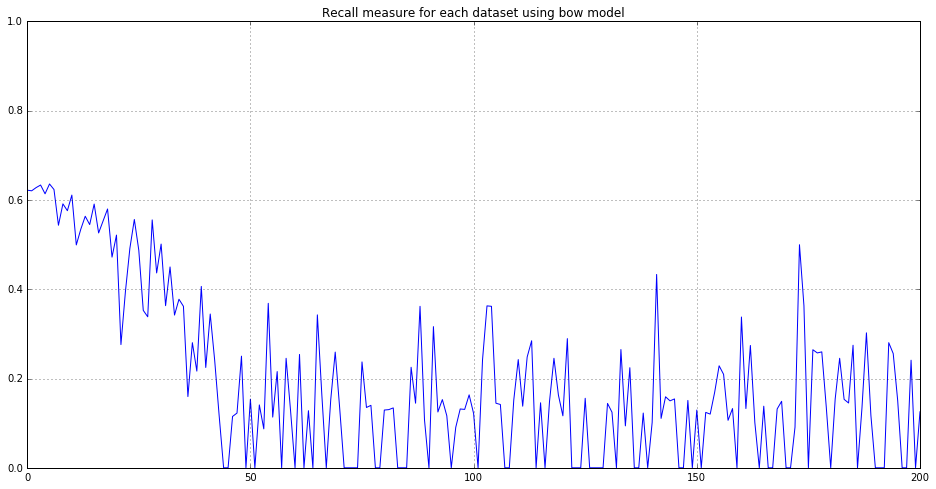

In [ ]:
plot_perf('./dqn_full_bow_model_perf.txt', 'Recall', 'blue')
plot_perf('./dqn_full_lstm_model_perf.txt', 'Recall','red')

0.712242


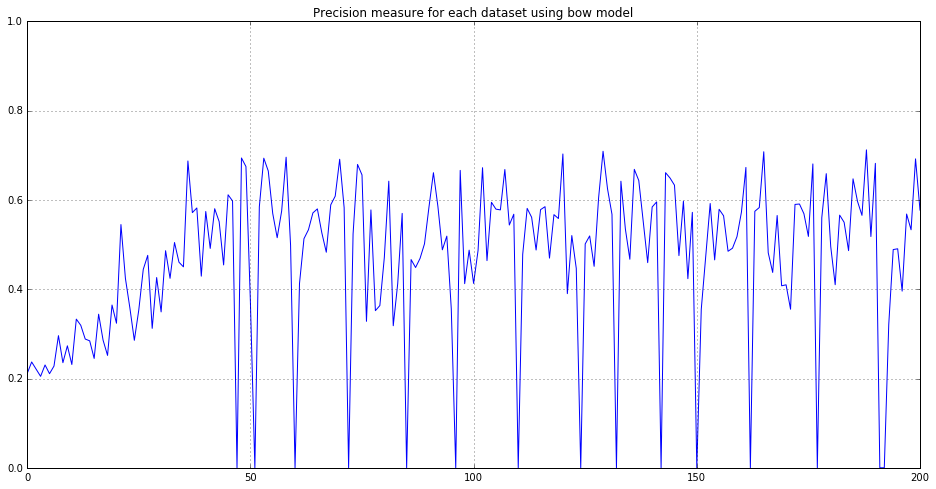

0.779141


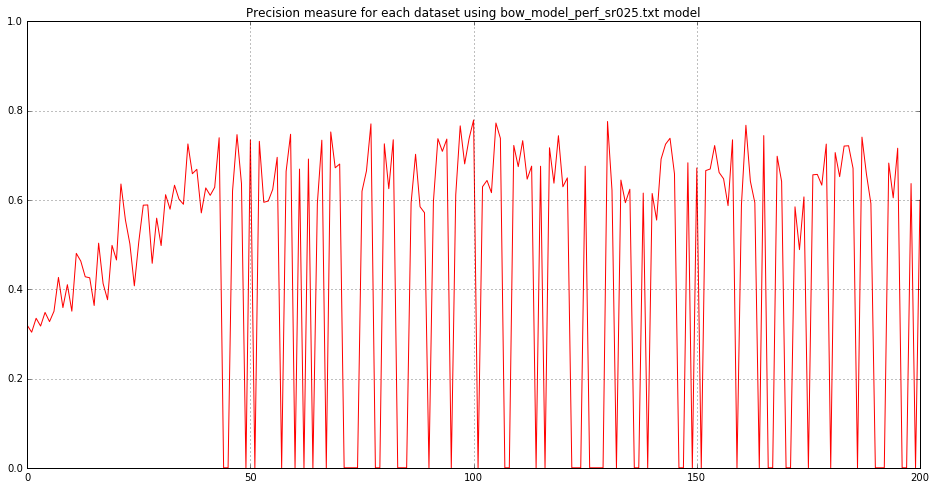

0.779141


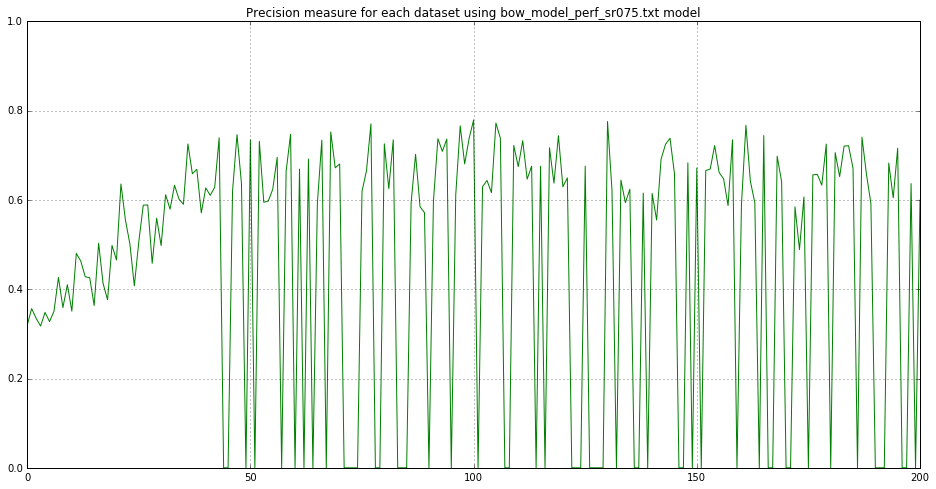

In [84]:
plot_perf('./dqn_full_bow_model_perf.txt', 'Precision', 'blue')
plot_perf('./dqn_full_bow_model_perf_sr025.txt', 'Precision','red')
plot_perf('./dqn_full_bow_model_perf_sr075.txt', 'Precision','green')

0.756588


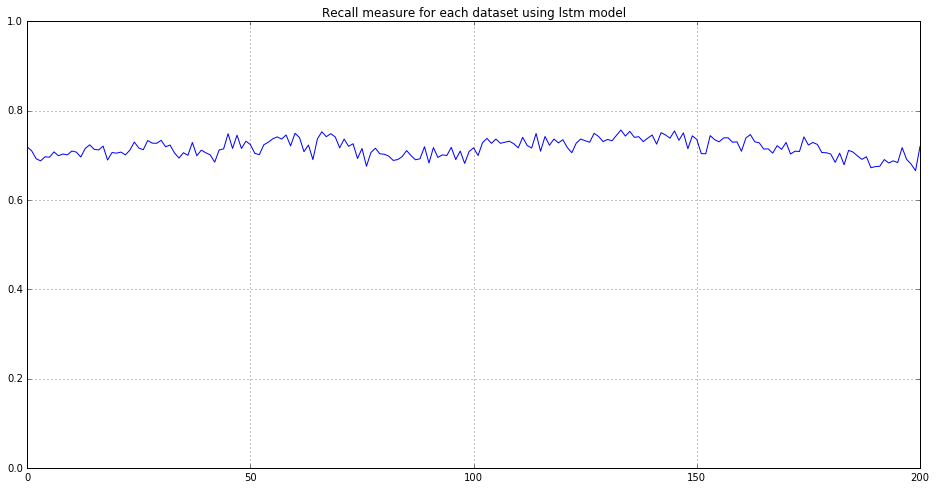

0.727011


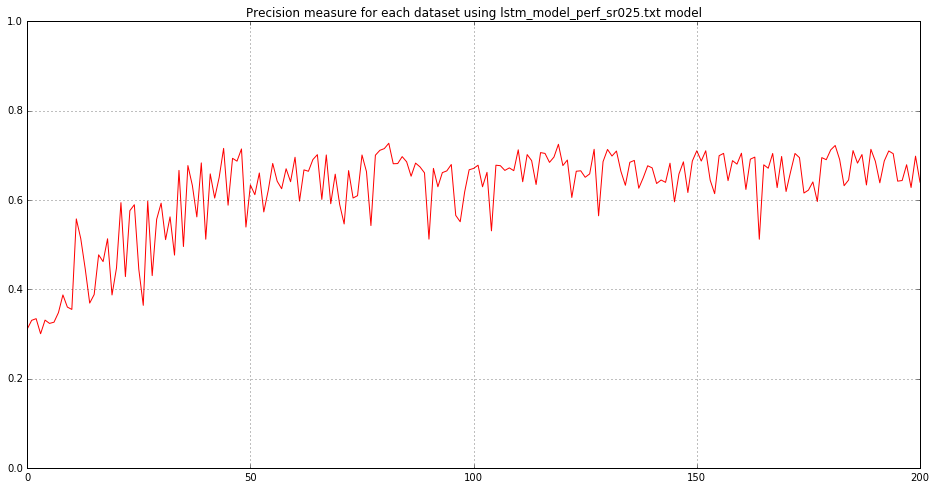

0.706806


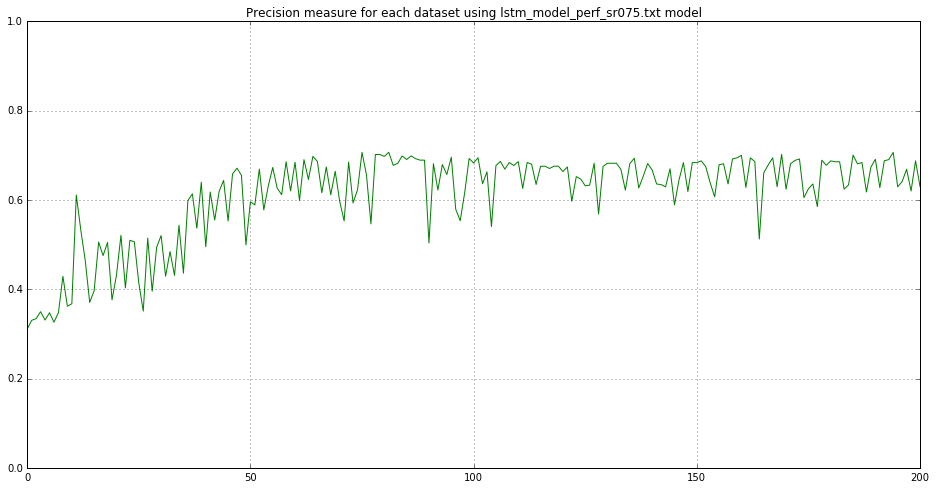

In [93]:
plot_perf('./dqn_full_lstm_model_perf.txt', 'Recall','blue')
plot_perf('./dqn_full_lstm_model_perf_sr025.txt', 'Precision','red')
plot_perf('./dqn_full_lstm_model_perf_sr075.txt', 'Precision','green')